In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

In [3]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Use integer division here
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), 
                          xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# HAM10000_metadata.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


In [7]:
df1.head(5)

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

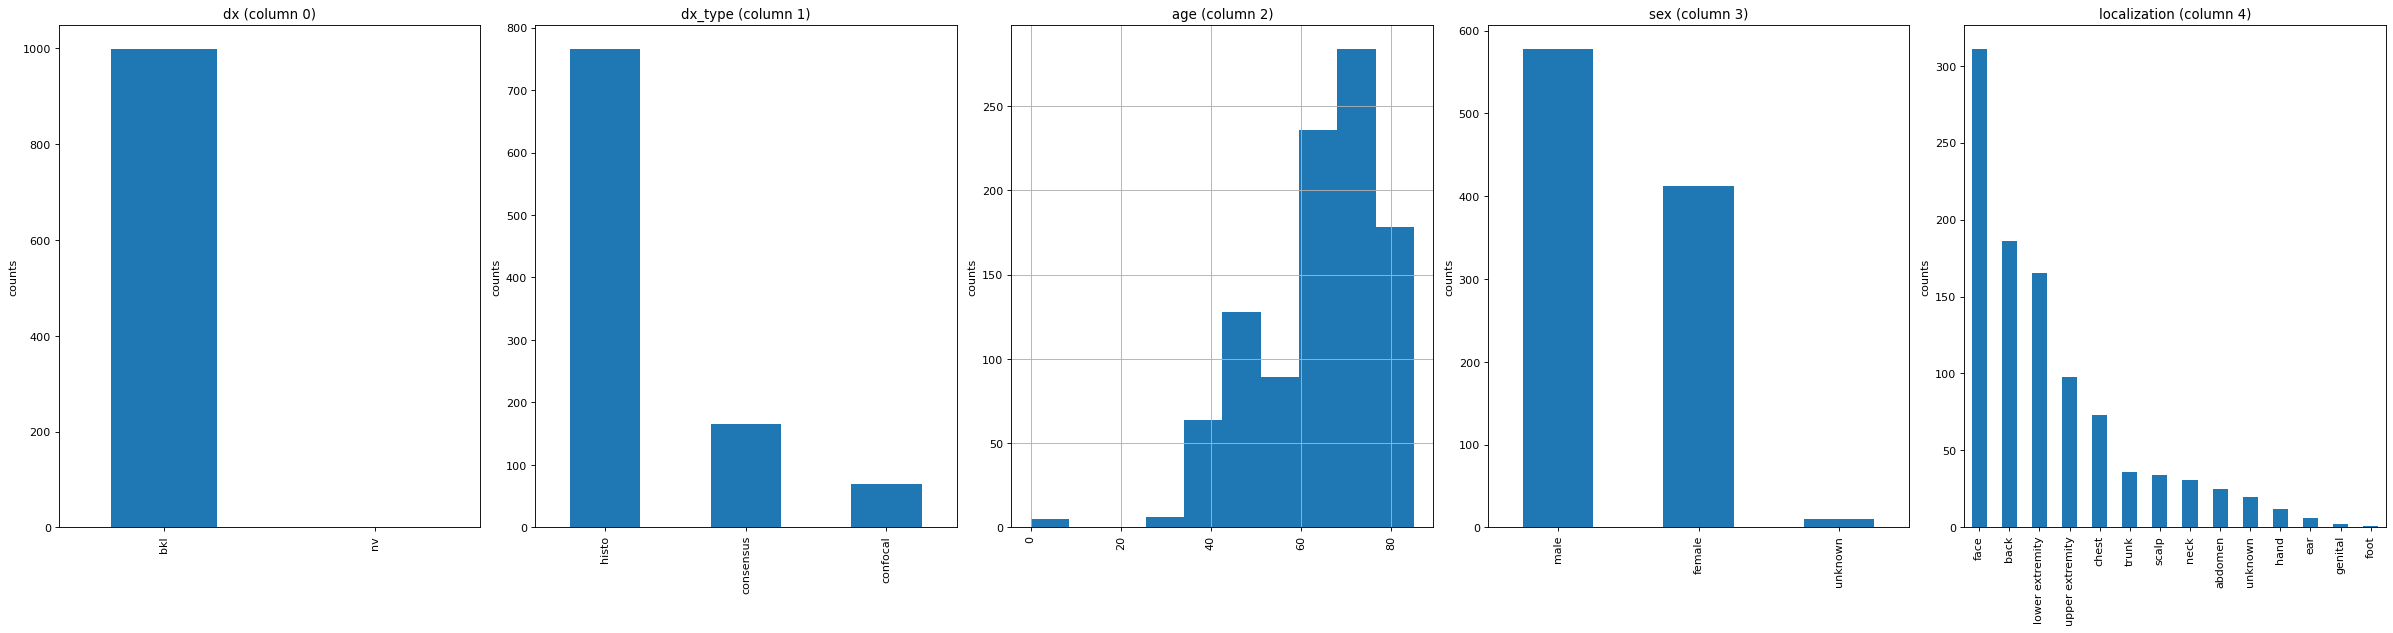

In [8]:
plotPerColumnDistribution(df1, 10, 5)

In [9]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# hmnist_28_28_L.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = '/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 785 columns


In [10]:
df2.head(5)

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        169        171        170        177        181        182   
1         19         57        105        140        149        148   
2        155        163        161        167        167        172   
3         25         71        116        139        136        153   
4        129        162        181        196        205        208   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0775  pixel0776  \
0        181        185        194        192  ...        184        186   
1        144        155        170        170  ...        172        175   
2        155        152        165        175  ...        163        178   
3        148        161        172        162  ...        125        135   
4        205        213        225        224  ...        210        197   

   pixel0777  pixel0778  pixel0779  pixel0780  pixel0781  pixel0782  \
0        185        180        157        140        140        159   
1        160        144        114         89         47         18   
2        157        166        167        148        141        136   
3        138        137        111         71         32         16   
4        172        190        195        193        181        147   

   pixel0783  label  
0        165      2  
1         18      2  
2        115      2  
3         16      2  
4         88      2  

[5 rows x 785 columns]

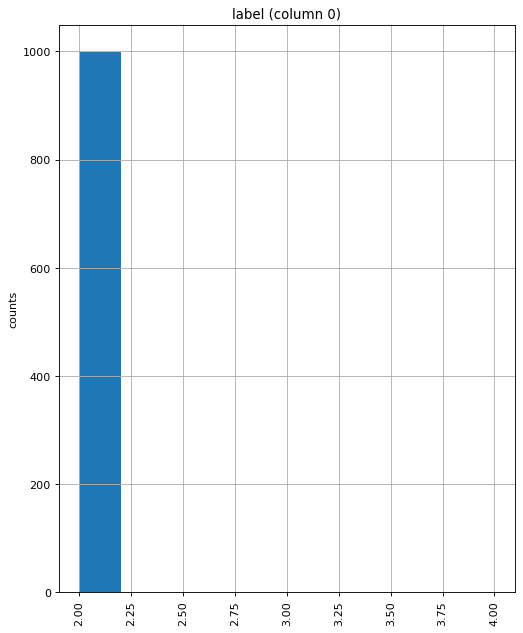

In [11]:
plotPerColumnDistribution(df2, 10, 5)

In [12]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# hmnist_28_28_RGB.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = '/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 2353 columns


In [13]:
df3.head(5)

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

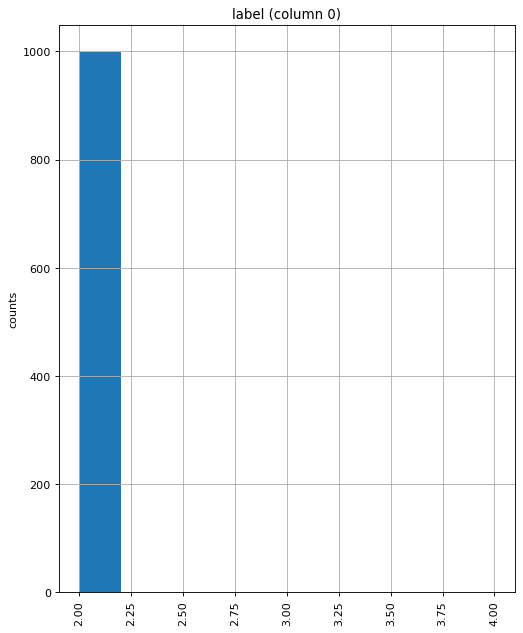

In [14]:
plotPerColumnDistribution(df3, 10, 5)

In [15]:
import os
import sys
import time
from glob import glob
from tqdm.notebook import tqdm

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

import cv2
from PIL import Image
import shutil

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

# TensorFlow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

from IPython.display import YouTubeVideo
import albumentations as A

# Set environment settings and pandas display options
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Setting styles
sns.set_style('darkgrid')

# Warning settings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

print('All modules have been imported')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

All modules have been imported


In [16]:
base_skin_dir = os.path.join('/', 'kaggle/input/skin-cancer-mnist-ham10000')

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

tile_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
tile_df['path'] = tile_df['image_id'].map(imageid_path_dict.get)
tile_df['cell_type'] = tile_df['dx'].map(lesion_type_dict.get) 
tile_df['cell_type_idx'] = pd.Categorical(tile_df['cell_type']).codes
tile_df.sample(3)

lesion_id      image_id  dx    dx_type   age     sex     localization  \
7173  HAM_0005374  ISIC_0034079  nv      histo  60.0  female  upper extremity   
4350  HAM_0005949  ISIC_0027148  nv  follow_up  45.0    male  upper extremity   
3701  HAM_0000228  ISIC_0025146  nv  follow_up  50.0  female             hand   

                                                                                  path  \
7173  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0034079.jpg   
4350  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027148.jpg   
3701  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025146.jpg   

             cell_type  cell_type_idx  
7173  Melanocytic nevi              4  
4350  Melanocytic nevi              4  
3701  Melanocytic nevi              4

In [17]:
df = pd.DataFrame() # columns=["filepaths", "labels"]

df['filepaths'] =tile_df['path']
df['labels'] =tile_df['cell_type_idx']
df['labels'] =df['labels'].apply(lambda x: str(x))
df.head()

filepaths  \
0  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027419.jpg   
1  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025030.jpg   
2  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026769.jpg   
3  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025661.jpg   
4  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031633.jpg   

  labels  
0      2  
1      2  
2      2  
3      2  
4      2

In [18]:
# This df will be used for fairness evaluation
df2 = pd.DataFrame() 

df2['filepaths'] = tile_df['path']
df2['labels']    = tile_df['cell_type_idx']
df2['labels']    = df['labels'].apply(lambda x: str(x))
df2['age']       = tile_df['age']
df2['sex']       = tile_df['sex']
df2.head()

filepaths  \
0  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027419.jpg   
1  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025030.jpg   
2  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026769.jpg   
3  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025661.jpg   
4  /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031633.jpg   

  labels   age   sex  
0      2  80.0  male  
1      2  80.0  male  
2      2  80.0  male  
3      2  80.0  male  
4      2  75.0  male

In [19]:
df.labels.unique()

array(['2', '4', '3', '5', '6', '1', '0'], dtype=object)

In [20]:
def split_df(df, trsize, column):
    train_df, dummy_df = train_test_split(df, train_size=trsize, shuffle=True, random_state=14, stratify=df[column])
    valid_df, test_df= train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=14, stratify=dummy_df[column])
    print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df)) 
    return train_df, test_df, valid_df    

train_df, test_df, valid_df  = split_df(df, .8, 'labels')

train_df length:  8012   test_df length:  1002   valid_df length:  1001


In [21]:
train_df2, test_df2, valid_df2  = split_df(df2, .8, 'labels')

train_df length:  8012   test_df length:  1002   valid_df length:  1001


In [22]:
def plot_label_count (df, plot_title):
    column='labels'
    xaxis_label='CLASS'
    yaxis_label='IMAGE COUNT'
    vcounts=df[column].value_counts()
    labels=vcounts.keys().tolist()    
    values=vcounts.tolist() 
    lcount=len(labels)
    if lcount>55:
        print_in_color('The number of labels is >55, no plot will be produced')
    else:
        width=lcount * 4
        width=np.min([width, 20])
        plt.figure(figsize=(width,5)) 
        form = {'family': 'serif', 'color': 'blue', 'size': 25} 
        plt.bar(labels, values)
        plt.title(plot_title, fontsize= 24, color='blue')
        plt.xticks(rotation=90, fontsize=18)
        plt.yticks(fontsize=18)
        plt.xlabel(xaxis_label, fontdict=form)
        plt.ylabel(yaxis_label, fontdict=form)
        if lcount >=8:
            rotation='vertical'
        else:
            rotation='horizontal'
        for i in range(lcount):
            plt.text(i, values[i]/2, str(values[i]),fontsize=12, rotation=rotation, color='yellow', ha='center')        
        plt.show()

4    5364
5     890
2     879
1     411
0     262
6     114
3      92
Name: labels, dtype: int64


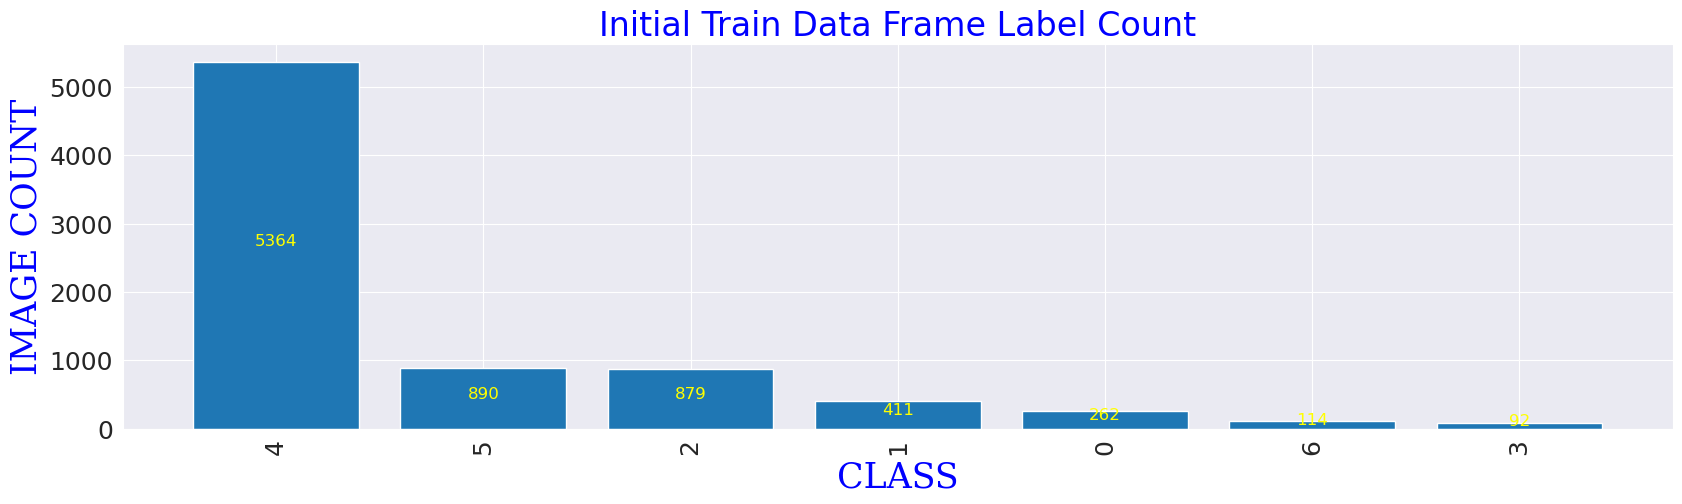

In [23]:
count=train_df['labels'].value_counts()
print (count)
plot_title='Initial Train Data Frame Label Count'
plot_label_count (train_df, plot_title)

In [24]:
def trim(df, max_samples, min_samples, column):
    df=df.copy()
    classes= df[column].unique()
    print(classes)
    class_count=len(classes)
    length=len(df)
    print ('dataframe initially is of length ',length, ' with ', class_count, ' classes')
    groups=df.groupby(column)    
    trimmed_df = pd.DataFrame(columns = df.columns)
    groups=df.groupby(column)
    for label in df[column].unique(): 
        group=groups.get_group(label)
        count=len(group)    
        if count > max_samples:
            sampled_group=group.sample(n=max_samples, random_state=123,axis=0)
            trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
        else:
            if count>=min_samples:
                sampled_group=group        
                trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
    print('after trimming, the maximum samples in any class is now ',max_samples, ' and the minimum samples in any class is ', min_samples)
    classes=trimmed_df[column].unique()# return this in case some classes have less than min_samples
    class_count=len(classes) # return this in case some classes have less than min_samples
    length=len(trimmed_df)
    print ('the trimmed dataframe now is of length ',length, ' with ', class_count, ' classes')
    return trimmed_df, classes, class_count

max_samples=1000
min_samples= 10
column='labels'
train_df, classes, class_count= trim(train_df, max_samples, min_samples, column)

['4' '5' '0' '1' '2' '6' '3']
dataframe initially is of length  8012  with  7  classes
after trimming, the maximum samples in any class is now  1000  and the minimum samples in any class is  10
the trimmed dataframe now is of length  3648  with  7  classes


In [25]:
def balance(df, n,column, working_dir, img_size):
    def get_augmented_image(image):
        width=int(image.shape[1]*.8)
        height=int(image.shape[0]*.8)
        transform= A.Compose([
            A.HorizontalFlip(p=.5),
            A.Rotate(limit=30, p=.25),
            A.RandomBrightnessContrast(p=.5),
            A.RandomGamma(p=.5),
            A.RandomCrop(width=width, height=height, p=.25) ])    
        return transform(image=image)['image']
    def dummy(image):
        return image

    df=df.copy()
    print('Initial length of dataframe is ', len(df))
    aug_dir=os.path.join(working_dir, 'aug')# directory to store augmented images
    if os.path.isdir(aug_dir):# start with an empty directory
        shutil.rmtree(aug_dir)
    os.mkdir(aug_dir)        
    for label in df[column].unique():    
        dir_path=os.path.join(aug_dir,label)    
        os.mkdir(dir_path) # make class directories within aug directory
    # create and store the augmented images  
    total=0    
    groups=df.groupby(column) # group by class
    for label in df[column].unique():  # for every class               
        group=groups.get_group(label)  # a dataframe holding only rows with the specified label 
        sample_count=len(group)   # determine how many samples there are in this class  
        if sample_count< n: # if the class has less than target number of images
            aug_img_count=0
            delta=n - sample_count  # number of augmented images to create
            target_dir=os.path.join(aug_dir, label)  # define where to write the images            
            desc=f'augmenting class {label}'
            for i in tqdm(range(delta), ncols=120, unit='files', colour='blue',desc=desc):
                j= i % sample_count
                img_path=group['filepaths'].iloc[j]
                img=cv2.imread(img_path)
                img=get_augmented_image(img)
                fname=os.path.basename(img_path)
                fname='aug' +str(i) +'-' +fname
                dest_path=os.path.join(target_dir, fname)                
                cv2.imwrite(dest_path, img)
                aug_img_count +=1
            total +=aug_img_count
    print('Total Augmented images created= ', total)
    # create aug_df and merge with train_df to create composite training set ndf
    aug_fpaths=[]
    aug_labels=[]
    classlist=sorted(os.listdir(aug_dir))
    for klass in classlist:
        classpath=os.path.join(aug_dir, klass)     
        flist=sorted(os.listdir(classpath))    
        for f in flist:        
            fpath=os.path.join(classpath,f)         
            aug_fpaths.append(fpath)
            aug_labels.append(klass)
    Fseries=pd.Series(aug_fpaths, name='filepaths')
    Lseries=pd.Series(aug_labels, name='labels')   
    aug_df=pd.concat([Fseries, Lseries], axis=1)         
    df=pd.concat([df,aug_df], axis=0).reset_index(drop=True)
    print('Length of augmented dataframe is now ', len(df))
    return df 

n=1000
working_dir=r'/kaggle/working/'
img_size = (310,640)
column='labels'
train_df=balance(train_df, n,column, working_dir, img_size)

Initial length of dataframe is  3648


augmenting class 5:   0%|                                                                    | 0/110 [00:00<?,…

augmenting class 0:   0%|                                                                    | 0/738 [00:00<?,…

augmenting class 1:   0%|                                                                    | 0/589 [00:00<?,…

augmenting class 2:   0%|                                                                    | 0/121 [00:00<?,…

augmenting class 6:   0%|                                                                    | 0/886 [00:00<?,…

augmenting class 3:   0%|                                                                    | 0/908 [00:00<?,…

Total Augmented images created=  3352
Length of augmented dataframe is now  7000


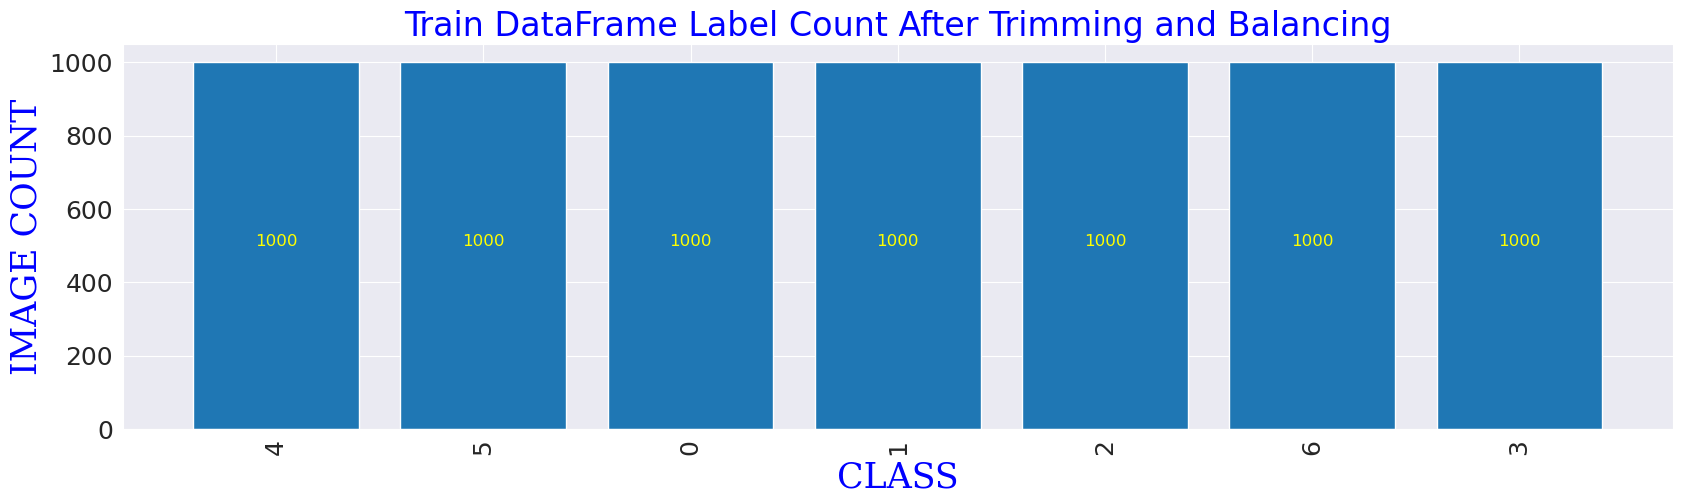

In [26]:
plot_title='Train DataFrame Label Count After Trimming and Balancing'
plot_label_count (train_df, plot_title)

In [27]:
def make_gens(batch_size, ycol, train_df, test_df, valid_df, img_size):
    trgen=ImageDataGenerator(horizontal_flip=True)    
    t_and_v_gen=ImageDataGenerator()
    msg='{0:70s} for train generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    train_gen=trgen.flow_from_dataframe(train_df, 
                                        x_col='filepaths', 
                                        y_col=ycol, 
                                        target_size=img_size,
                                       class_mode='categorical', 
                                        color_mode='rgb', 
                                        shuffle=True, 
                                        batch_size=batch_size)
    msg='{0:70s} for valid generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, 
                                              x_col='filepaths', 
                                              y_col=ycol, 
                                              target_size=img_size,
                                              class_mode='categorical', 
                                              color_mode='rgb', 
                                              shuffle=False, 
                                              batch_size=batch_size)
    # for the test_gen we want to calculate the batch size and 
    # test steps such that batch_size X test_steps= number of samples in test set
    # this insures that we go through all the sample in the test set exactly once.
    length=len(test_df)
    test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
    test_steps=int(length/test_batch_size)    
    msg='{0:70s} for test generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', 
                                             y_col=ycol, 
                                             target_size=img_size,
                                             class_mode='categorical', 
                                             color_mode='rgb', 
                                             shuffle=False, 
                                             batch_size=test_batch_size)
    # from the generator we can get information we will need later
    classes=list(train_gen.class_indices.keys())
    class_indices=list(train_gen.class_indices.values())
    class_count=len(classes)
    labels=test_gen.labels
    print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)
    return train_gen, test_gen, valid_gen, test_steps

bs=16
ycol='labels'
train_gen, test_gen, valid_gen, test_steps = make_gens(bs, ycol, train_df, test_df, valid_df, img_size)

Found 7000 validated image filenames belonging to 7 classes.           for train generator 
Found 1001 validated image filenames belonging to 7 classes.           for valid generator 
Found 1002 validated image filenames belonging to 7 classes.           for test generator 
test batch size:  6   test steps:  167  number of classes :  7


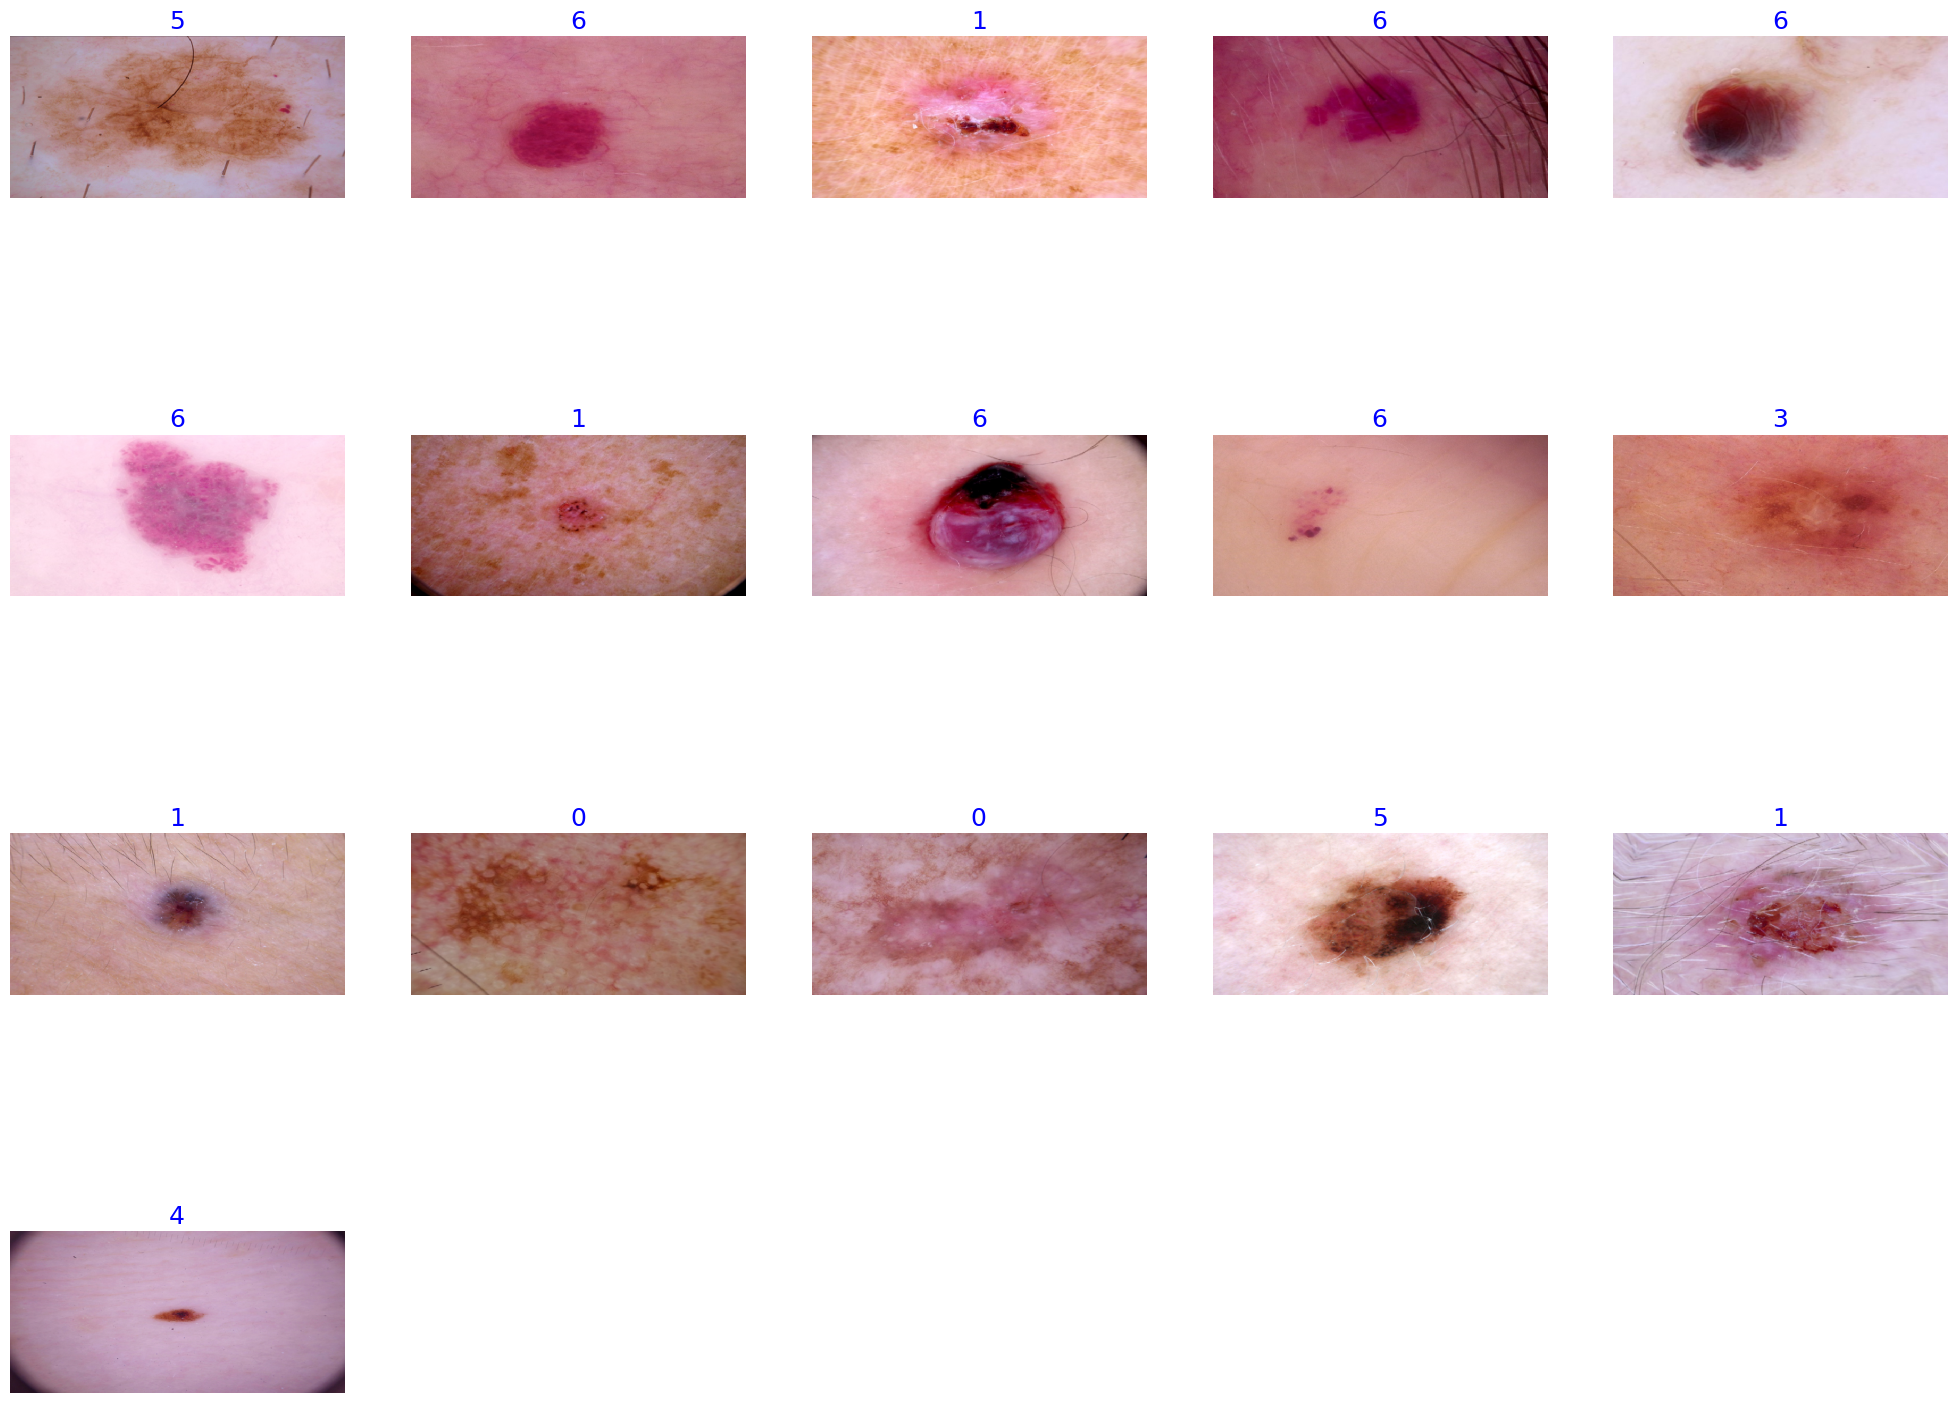

In [28]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(25, 25))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i] /255       
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=18)
        plt.axis('off')
    plt.show()
    
show_image_samples(train_gen )

In [29]:
def F1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [30]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    # prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    # text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

In [31]:
def make_model():
    base_model= tf.keras.applications.densenet.DenseNet201(
        include_top=True,
        weights='imagenet',
        input_tensor=None,
        input_shape=None,
        pooling=None,
        classes=1000,
        classifier_activation='softmax'
    )
    base_model.trainable=True
    x=base_model.output
    x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
    x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
    x=Dropout(rate=.4, seed=123)(x)       
    output=Dense(class_count, activation='softmax')(x)
    model=Model(inputs=base_model.input, outputs=output)
    model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy', F1_score, 'AUC'])
    return model

In [32]:
lr=.001
model=make_model()

82524592/82524592 [==============================] - 1s 0us/step


In [33]:
history=model.fit(x=train_gen, 
                  epochs=10, 
                  verbose=1, 
                  validation_data=valid_gen, validation_steps=None, shuffle=False, initial_epoch=0)

Epoch 1/10
438/438 [==============================] - 390s 594ms/step - loss: 2.0848 - accuracy: 0.5809 - F1_score: 0.4046 - auc: 0.8791 - val_loss: 1.5306 - val_accuracy: 0.5375 - val_F1_score: 0.2402 - val_auc: 0.8972
Epoch 2/10
438/438 [==============================] - 244s 556ms/step - loss: 1.0641 - accuracy: 0.7316 - F1_score: 0.6902 - auc: 0.9462 - val_loss: 2.2706 - val_accuracy: 0.1678 - val_F1_score: 0.1471 - val_auc: 0.7355
Epoch 3/10
438/438 [==============================] - 244s 557ms/step - loss: 0.8708 - accuracy: 0.7769 - F1_score: 0.7616 - auc: 0.9640 - val_loss: 1.0586 - val_accuracy: 0.7103 - val_F1_score: 0.6928 - val_auc: 0.9389
Epoch 4/10
438/438 [==============================] - 245s 559ms/step - loss: 0.7414 - accuracy: 0.8144 - F1_score: 0.8047 - auc: 0.9749 - val_loss: 1.5664 - val_accuracy: 0.5365 - val_F1_score: 0.5370 - val_auc: 0.8947
Epoch 5/10
438/438 [==============================] - 244s 557ms/step - loss: 0.6709 - accuracy: 0.8383 - F1_score: 0.82

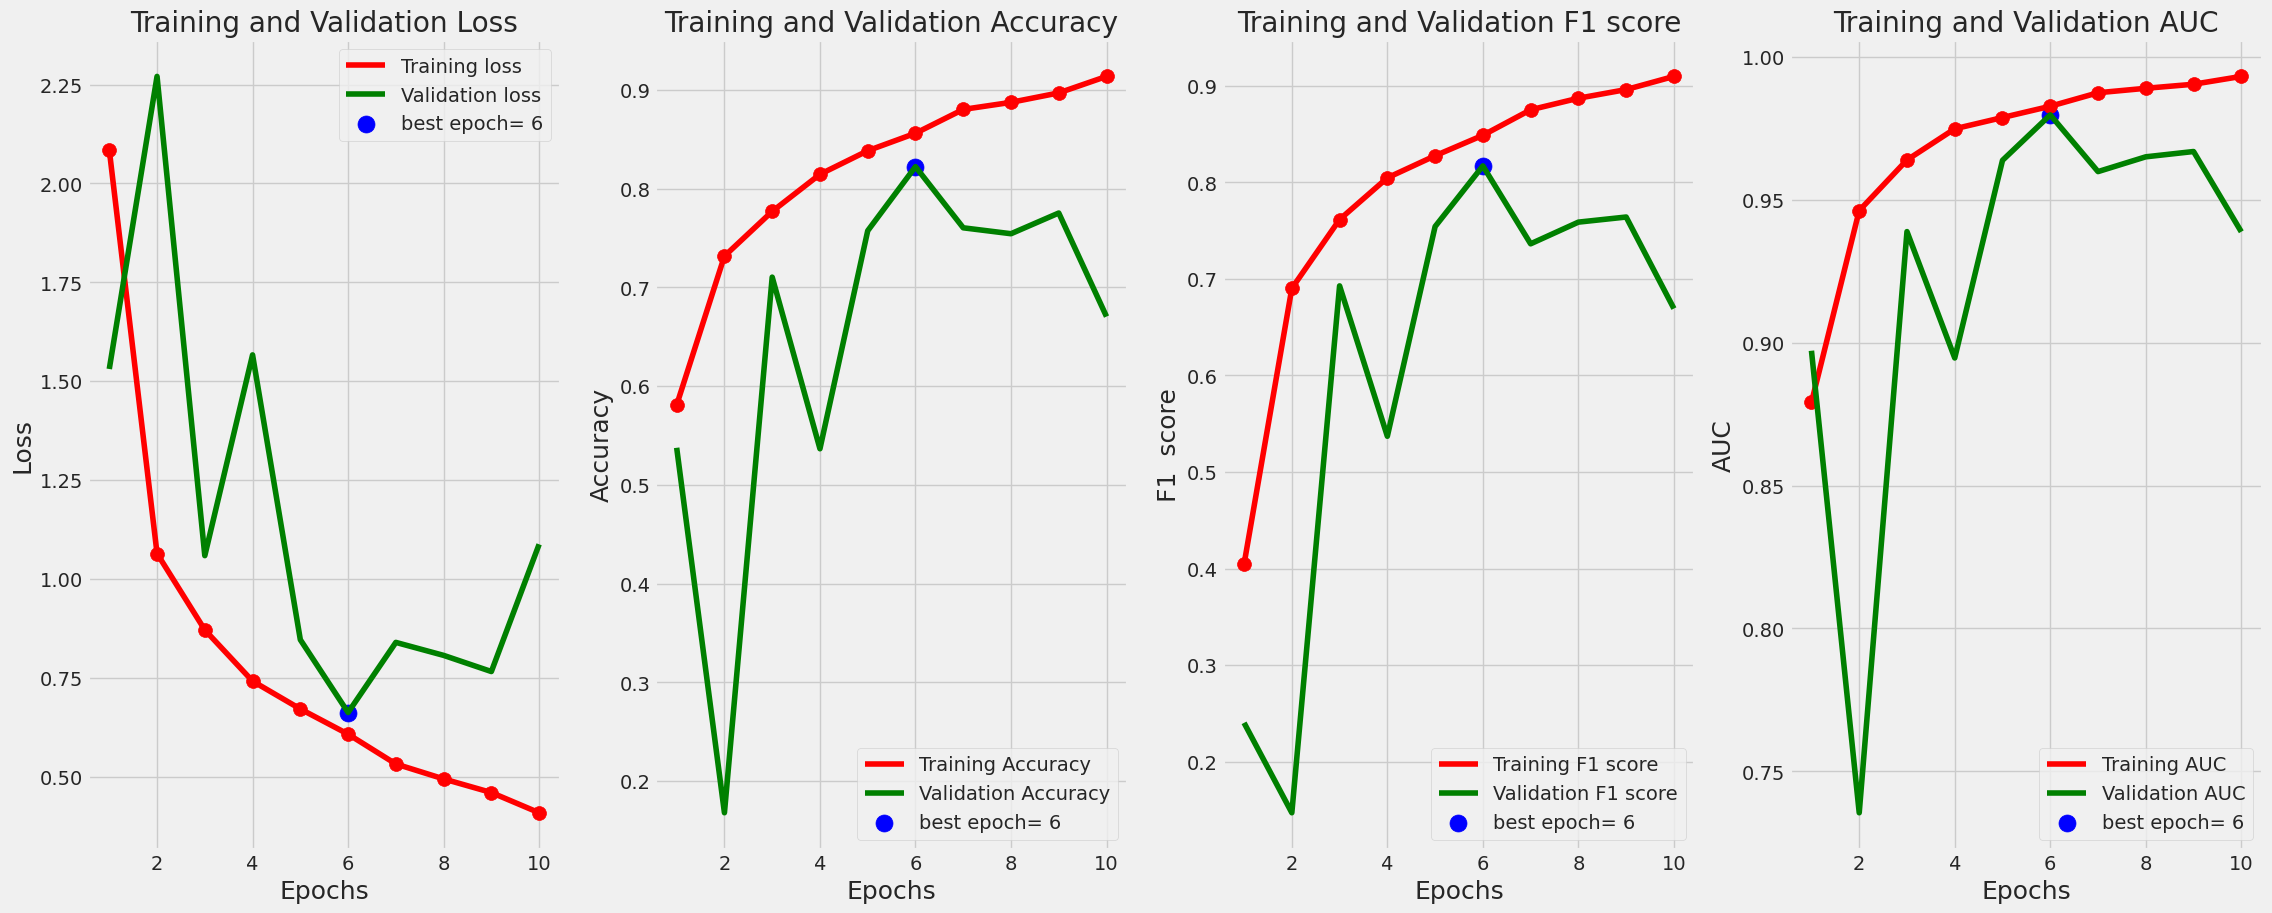

In [34]:
def tr_plot(tr_data):
    start_epoch=0
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    tf1=tr_data.history['F1_score']
    vf1=tr_data.history['val_F1_score']
    tauc=tr_data.history['auc']
    vauc=tr_data.history['val_auc']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    auc_index=np.argmax(vauc)
    val_highest_auc=vauc[auc_index]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    auc_label='best epoch= ' + str(auc_index + 1 + start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=4, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].scatter(Epochs, tloss, s=100, c='red')    
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].scatter(Epochs, tacc, s=100, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    axes[2].plot (Epochs,tf1,'r',label= 'Training F1 score')    
    axes[2].plot (Epochs,vf1,'g',label= 'Validation F1 score')
    index_tf1=np.argmax(tf1)#  this is the epoch with the highest training F1 score
    tf1max=tf1[index_tf1]
    index_vf1=np.argmax(vf1)# thisiis the epoch with the highest validation F1 score
    vf1max=vf1[index_vf1]
    axes[2].scatter(index_vf1+1 +start_epoch,vf1max, s=150, c= 'blue', label=vc_label)    
    axes[2].scatter(Epochs, tf1, s=100, c='red')
    axes[2].set_title('Training and Validation F1 score')
    axes[2].set_xlabel('Epochs', fontsize=18)
    axes[2].set_ylabel('F1  score', fontsize=18)
    axes[2].legend()
    axes[3].plot(Epochs,tauc, 'r', label='Training AUC')
    axes[3].plot(Epochs,vauc,'g',label='Validation AUC' )
    axes[3].scatter(auc_index+1 +start_epoch,val_highest_auc, s=150, c= 'blue', label=sc_label)
    axes[3].scatter(Epochs, tauc, s=100, c='red')    
    axes[3].set_title('Training and Validation AUC')
    axes[3].set_xlabel('Epochs', fontsize=18)
    axes[3].set_ylabel('AUC', fontsize=18)
    axes[3].legend()
    plt.tight_layout    
    plt.show()
    return 
    
tr_plot(history)

167/167 [==============================] - 25s 114ms/step
there were 325 errors in 1002 tests for an accuracy of  67.56



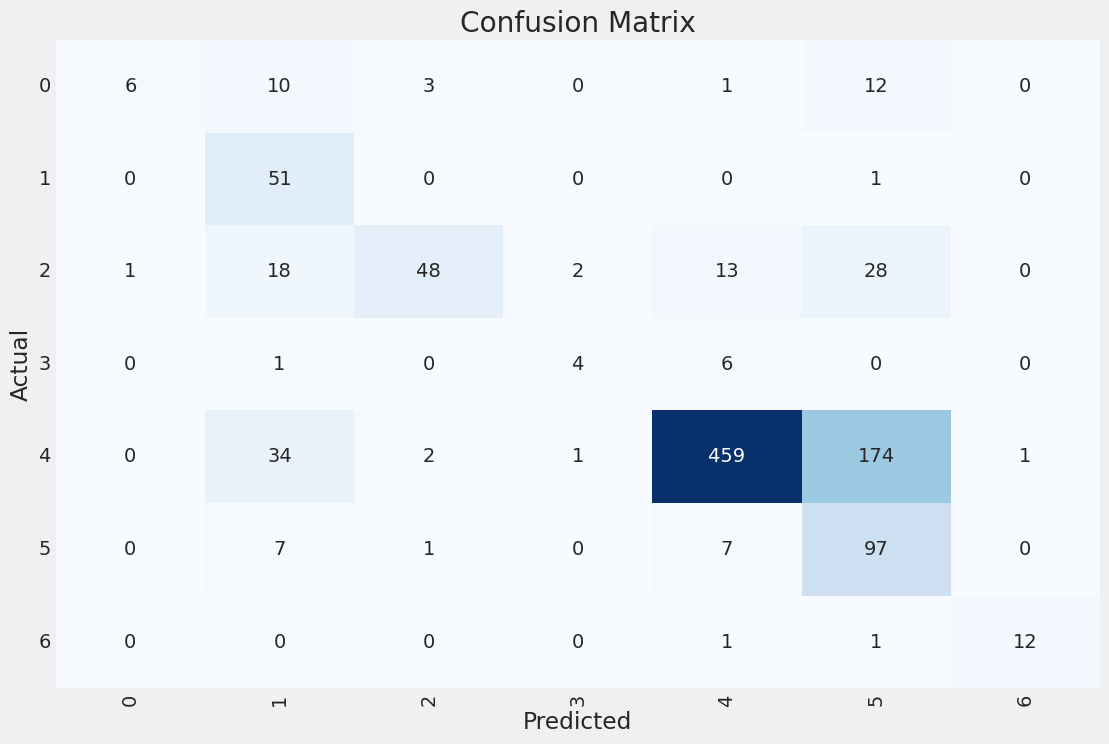

Classification Report:
----------------------
               precision    recall  f1-score   support

           0     0.8571    0.1875    0.3077        32
           1     0.4215    0.9808    0.5896        52
           2     0.8889    0.4364    0.5854       110
           3     0.5714    0.3636    0.4444        11
           4     0.9425    0.6841    0.7927       671
           5     0.3099    0.8661    0.4565       112
           6     0.9231    0.8571    0.8889        14

    accuracy                         0.6756      1002
   macro avg     0.7021    0.6251    0.5807      1002
weighted avg     0.8318    0.6756    0.7039      1002



In [35]:
from sklearn.metrics import confusion_matrix 

def predictor(test_gen):    
    y_pred= []
    error_list=[]
    error_pred_list = []
    y_true=test_gen.labels
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, verbose=1)
    tests=len(preds)    
    for i, p in enumerate(preds):        
        pred_index=np.argmax(p)         
        true_index=test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors=errors + 1
            file=test_gen.filenames[i]
            error_list.append(file)
            error_class=classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)
            
    acc=( 1-errors/tests) * 100
    msg=f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}'
    print_in_color(msg, (0,255,255), (100,100,100)) # cyan foreground
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests, error_list, error_pred_list, f1score, y_pred, y_true

errors, tests, error_list, error_pred_list, f1score, y_pred, y_true = predictor(test_gen)

In [36]:
# Restore variables, target and prediction for ease to analyse
def eval_df(variables, target, prediction):
    tempdf = pd.DataFrame(variables.copy())
    tempdf["Actual"] = target
    tempdf["Prediction"] = prediction
    return tempdf

evaldf = eval_df(test_df2['age'], y_true, y_pred)
evaldf.head()

age  Actual  Prediction
4801  45.0       4           4
5052  65.0       4           4
6643  55.0       4           1
8952  55.0       4           5
7435  40.0       4           4

In [37]:
# Function to get counts for each class combination (Actual vs. Prediction)
def get_counts(age, actual_class, predicted_class):
    return len(evaldf[(evaldf["Actual"] == actual_class) & (evaldf["Prediction"] == predicted_class) & (evaldf["age"] >= age) & (evaldf["age"] < age + 10)])

# Confusion matrix for 7 classes
def confusion_matrix2(age):
    matrix = [[0] * 7 for _ in range(7)]
    for actual_class in range(7):
        for predicted_class in range(7):
            matrix[actual_class][predicted_class] = get_counts(age, actual_class, predicted_class)
    return matrix

# True Positives for a given class
def true_positive(age, class_label):
    matrix = confusion_matrix2(age)
    return matrix[class_label][class_label]

# False Positives for a given class
def false_positive(age, class_label):
    matrix = confusion_matrix2(age)
    return sum(matrix[i][class_label] for i in range(7)) - matrix[class_label][class_label]

# True Negatives for a given class
def true_negative(age, class_label):
    matrix = confusion_matrix2(age)
    return sum(matrix[i][j] for i in range(7) for j in range(7)) - sum(matrix[i][class_label] for i in range(7)) - sum(matrix[class_label][j] for j in range(7)) + matrix[class_label][class_label]

# False Negatives for a given class
def false_negative(age, class_label):
    matrix = confusion_matrix2(age)
    return sum(matrix[class_label][i] for i in range(7)) - matrix[class_label][class_label]

In [38]:
# Equal Opportunity TPR = TP/(TP + FN)
def tprate(age, class_label):
    tp = true_positive(age, class_label)
    fn = false_negative(age, class_label)
    return tp / (tp + fn) if tp + fn != 0 else 0

# Demographic parity = (TP + FP) / (TP + TN + FP + FN)
def demographicparity(age, class_label):
    tp = true_positive(age, class_label)
    tn = true_negative(age, class_label)
    fp = false_positive(age, class_label)
    fn = false_negative(age, class_label)
    return (tp + fp) / (tp + tn + fp + fn) if tp + tn + fp + fn != 0 else 0

# Accuracy = (TP + TN) / (TP + TN + FP + FN)
def accuracy_age(age, class_label):
    tp = true_positive(age, class_label)
    tn = true_negative(age, class_label)
    fp = false_positive(age, class_label)
    fn = false_negative(age, class_label)
    return (tp + tn) / (tp + tn + fp + fn) if tp + tn + fp + fn != 0 else 0

tpratelist_0 = [tprate(10 * i, 0) for i in range(10)]
tpratelist_1 = [tprate(10 * i, 1) for i in range(10)]
tpratelist_2 = [tprate(10 * i, 2) for i in range(10)]
tpratelist_3 = [tprate(10 * i, 3) for i in range(10)]
tpratelist_4 = [tprate(10 * i, 4) for i in range(10)]
tpratelist_5 = [tprate(10 * i, 5) for i in range(10)]
tpratelist_6 = [tprate(10 * i, 6) for i in range(10)]

In [39]:
# Create a DataFrame to contain the data
data = {
    'Age Group': [f'{10*i}-{10*i+9}' for i in range(10)] * 7,
    'True Positive Rate': tpratelist_0 + tpratelist_1 + tpratelist_2 + tpratelist_3 + tpratelist_4 + tpratelist_5 + tpratelist_6,
    'Class': ['Class 0'] * 10 + ['Class 1'] * 10 + ['Class 2'] * 10 + ['Class 3'] * 10 + ['Class 4'] * 10 + ['Class 5'] * 10 + ['Class 6'] * 10
}

df = pd.DataFrame(data)

# Create the bar plot
fig = px.bar(df, x='Age Group', y='True Positive Rate', color='Class', barmode='group', title='Equal Opportunity by Class vs. Age')

# Move the legend outside the plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.02,
    xanchor="left",
    x=1
))

fig.show()

In [40]:
demographicparitylist_0 = [demographicparity(10 * i, 0) for i in range(10)]
demographicparitylist_1 = [demographicparity(10 * i, 1) for i in range(10)]
demographicparitylist_2 = [demographicparity(10 * i, 2) for i in range(10)]
demographicparitylist_3 = [demographicparity(10 * i, 3) for i in range(10)]
demographicparitylist_4 = [demographicparity(10 * i, 4) for i in range(10)]
demographicparitylist_5 = [demographicparity(10 * i, 5) for i in range(10)]
demographicparitylist_6 = [demographicparity(10 * i, 6) for i in range(10)]


# Concatenate the demographic parity lists
demographic_parity_data = demographicparitylist_0 + demographicparitylist_1 + demographicparitylist_2 + demographicparitylist_3 + demographicparitylist_4 + demographicparitylist_5 + demographicparitylist_6

# Create a DataFrame to contain the data
data = {
    'Age Group': [f'{10*i}-{10*i+9}' for i in range(10)] * 7,
    'Demographic Parity Rate': demographic_parity_data,
    'Class': ['Class 0'] * 10 + ['Class 1'] * 10 + ['Class 2'] * 10 + ['Class 3'] * 10 + ['Class 4'] * 10 + ['Class 5'] * 10 + ['Class 6'] * 10
}

df = pd.DataFrame(data)

# Create the bar plot
fig = px.bar(df, x='Age Group', y='Demographic Parity Rate', color='Class', barmode='group', title='Demographic Parity by Class vs. Age')

# Move the legend outside the plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.02,
    xanchor="left",
    x=1
))

fig.show()

In [41]:
accuracy_age_data_0 = [accuracy_age(10 * i, 0) for i in range(10)]
accuracy_age_data_1 = [accuracy_age(10 * i, 1) for i in range(10)]
accuracy_age_data_2 = [accuracy_age(10 * i, 2) for i in range(10)]
accuracy_age_data_3 = [accuracy_age(10 * i, 3) for i in range(10)]
accuracy_age_data_4 = [accuracy_age(10 * i, 4) for i in range(10)]
accuracy_age_data_5 = [accuracy_age(10 * i, 5) for i in range(10)]
accuracy_age_data_6 = [accuracy_age(10 * i, 6) for i in range(10)]

# Concatenate the accuracy_age lists
accuracy_age_data = accuracy_age_data_0 + accuracy_age_data_1 + accuracy_age_data_2 + accuracy_age_data_3 + accuracy_age_data_4 + accuracy_age_data_5 + accuracy_age_data_6

# Create a DataFrame to contain the data
data = {
    'Age Group': [f'{10*i}-{10*i+9}' for i in range(10)] * 7,
    'Accuracy Age Rate': accuracy_age_data,
    'Class': ['Class 0'] * 10 + ['Class 1'] * 10 + ['Class 2'] * 10 + ['Class 3'] * 10 + ['Class 4'] * 10 + ['Class 5'] * 10 + ['Class 6'] * 10
}

df = pd.DataFrame(data)

# Create the bar plot
fig = px.bar(df, x='Age Group', y='Accuracy Age Rate', color='Class', barmode='group', title='Accuracy by Class vs. Age')

# Move the legend outside the plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.02,
    xanchor="left",
    x=1
))

fig.show()